<a href="https://colab.research.google.com/github/GabrielMtzSoltero/wsEMBS/blob/main/workshopEMBS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar los paquetes iniciailes

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Cargando el dataframe

In [4]:
with open('sample_data/kmer_str_classes.pkl', 'rb') as f:
     df=pickle.load(f)
     df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3794 entries, 0 to 3793
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   kmer_id           3794 non-null   int64 
 1   kmer_str          3794 non-null   object
 2   kmer_gocom_id_fk  3794 non-null   int64 
 3   target            3794 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 118.7+ KB


In [5]:
df.tail()

,kmer_id,kmer_str,kmer_gocom_id_fk,target
3789,1405106,A R C A Y A U H A A R A A,4270,3
3790,1405107,R C A Y A U H A A R A A R,4270,3
3791,1405109,A Y A U H A A R A A R A A,4270,3
3792,1405111,A U H A A R A A R A A Y A,4270,3
3793,1405112,U H A A R A A R A A Y A A,4270,3


In [6]:
strings=df["kmer_str"]

In [7]:
strings=[kmer.split(" ") for kmer in strings]
df2 = pd.DataFrame(strings, columns =['kmer1', 'kmer2','kmer3', 'kmer4', 'kmer5', 'kmer6','kmer7','kmer8', 'kmer9','kmer10','kmer11','kmer12','kmer13'])
df2.tail()

,kmer1,kmer2,kmer3,kmer4,kmer5,kmer6,kmer7,kmer8,kmer9,kmer10,kmer11,kmer12,kmer13
3789,A,R,C,A,Y,A,U,H,A,A,R,A,A
3790,R,C,A,Y,A,U,H,A,A,R,A,A,R
3791,A,Y,A,U,H,A,A,R,A,A,R,A,A
3792,A,U,H,A,A,R,A,A,R,A,A,Y,A
3793,U,H,A,A,R,A,A,R,A,A,Y,A,A


#hay que juntar los dataframe

In [8]:
df=pd.concat([df, df2],axis=1)
df.tail()

,kmer_id,kmer_str,kmer_gocom_id_fk,target,kmer1,kmer2,kmer3,kmer4,kmer5,kmer6,kmer7,kmer8,kmer9,kmer10,kmer11,kmer12,kmer13
3789,1405106,A R C A Y A U H A A R A A,4270,3,A,R,C,A,Y,A,U,H,A,A,R,A,A
3790,1405107,R C A Y A U H A A R A A R,4270,3,R,C,A,Y,A,U,H,A,A,R,A,A,R
3791,1405109,A Y A U H A A R A A R A A,4270,3,A,Y,A,U,H,A,A,R,A,A,R,A,A
3792,1405111,A U H A A R A A R A A Y A,4270,3,A,U,H,A,A,R,A,A,R,A,A,Y,A
3793,1405112,U H A A R A A R A A Y A A,4270,3,U,H,A,A,R,A,A,R,A,A,Y,A,A


In [10]:
corpus=np.load("sample_data/corpus.npy")
print(corpus)
corpus=[str(element) for element in corpus]
df=df.replace(corpus,[i for i in range(1,len(corpus)+1)])
df.head()

['A' 'O' 'R' 'N' 'C' 'Y' 'T' '0' 'G' 'J' 'U' 'X' 'H' 'B' 'Z']


,kmer_id,kmer_str,kmer_gocom_id_fk,target,kmer1,kmer2,kmer3,kmer4,kmer5,kmer6,kmer7,kmer8,kmer9,kmer10,kmer11,kmer12,kmer13
0,1101104,T G A C N A T G A U H A C,3964,1,7,9,1,5,4,1,7,9,1,11,13,1,5
1,1101107,C N A T G A U H A C N G A,3964,1,5,4,1,7,9,1,11,13,1,5,4,9,1
2,1101110,T G A U H A C N G A Y A G,3964,1,7,9,1,11,13,1,5,4,9,1,6,1,9
3,1101115,C N G A Y A G Y J T 0 G C,3964,1,5,4,9,1,6,1,9,6,10,7,8,9,5
4,1101116,N G A Y A G Y J T 0 G C N,3964,1,4,9,1,6,1,9,6,10,7,8,9,5,4


#Entrenamiento

In [11]:
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#quitmaos las columnas que no nos sirve
X=df.drop(["kmer_id","kmer_str","kmer_gocom_id_fk","target"], axis = 1)
y=df["target"]
#creamos el escalador
scaler = StandardScaler()
scaledXDF=X.copy()
#escalar los valores de entradas
scaledXDF[X.columns]=scaler.fit_transform(X)
#SPlitting into train and test
X_trainMM, X_testMM, y_train, y_test = train_test_split(scaledXDF, y, test_size = 0.33, random_state=1)



#creamos el modelo de un Perceptron multicapa
model2=MLPClassifier()
#model2=SVC(gamma=3, C=1)
#model2=DecisionTreeClassifier(max_depth=5)
#model2=GaussianNB()
#model2=KNeighborsClassifier(3)

#a entrenar
model2.fit(X_trainMM, y_train)
print("score train ",model2.score(X_trainMM, y_train))
print("score_test ",model2.score(X_testMM, y_test))

score train  0.9189295552931916
score_test  0.8459696727853152


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           1       0.90      0.95      0.93       885
           2       0.95      0.97      0.96      1149
           3       0.87      0.75      0.81       507

    accuracy                           0.92      2541
   macro avg       0.91      0.89      0.90      2541
weighted avg       0.92      0.92      0.92      2541



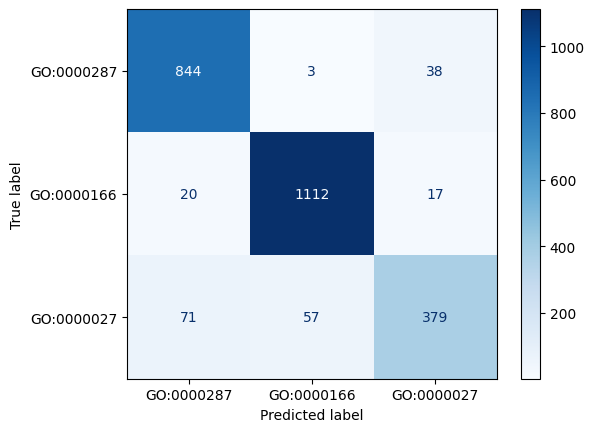

In [14]:
y_predMM=model2.predict(X_trainMM)
cm = confusion_matrix(y_train, y_predMM)
disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=["GO:0000287","GO:0000166","GO:0000027"])
disp.plot(cmap=plt.cm.Blues)
print(classification_report(y_train, y_predMM))

              precision    recall  f1-score   support

           1       0.83      0.89      0.86       465
           2       0.91      0.93      0.92       549
           3       0.70      0.57      0.63       239

    accuracy                           0.85      1253
   macro avg       0.81      0.80      0.80      1253
weighted avg       0.84      0.85      0.84      1253



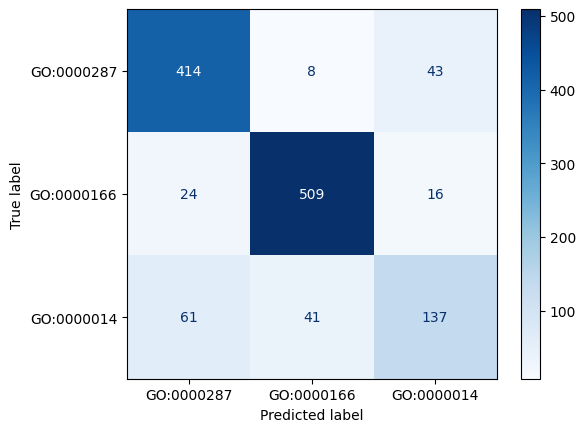

In [13]:
y_predMM=model2.predict(X_testMM)
cm = confusion_matrix(y_test, y_predMM)
disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=["GO:0000287","GO:0000166","GO:0000014"])
disp.plot(cmap=plt.cm.Blues)
print(classification_report(y_test, y_predMM))